In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from PhyPraKit import readPicoScope, resample
from scipy import signal
from scipy import interpolate
import sys
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
from uncertainties import ufloat, unumpy
from math import log10, floor
import scipy.integrate as integrate
import pandas as pd
import csv

Welcome to JupyROOT 6.24/06


/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


########
# Data #
########

    X Data
    10.0  
    15.0  
    20.0  
    25.0  
    30.0  
    35.0  
    40.0  
    45.0  
    50.0  

    Y Data
    7.996 
    11.84 
    16.03 
    19.8  
    24.04 
    27.89 
    32.06 
    35.81 
    40.06 

#########
# Model #
#########

    Model Function

        linear_model(N; a, b) = a * N + b

    X Model
    10.0   
    15.0   
    20.0   
    25.0   
    30.0   
    35.0   
    40.0   
    45.0   
    50.0   

    Y Model
    7.927  
    11.93  
    15.94  
    19.94  
    23.95  
    27.95  
    31.96  
    35.96  
    39.97  

###############
# Fit Results #
###############

    Model Parameters

        a = 0.8
        b = -0.084

    Cost Function

        Cost function: chi-square (no uncertainties)

        Cost = 0.09476



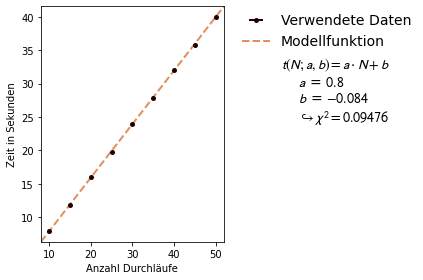

In [2]:
data=pd.read_csv('Messung/Aufgabe1_1.txt',delimiter=';',decimal=".",skiprows=2) #importiere Daten
data.columns=['N','t']
t = data['t'].to_numpy() 
N = data['N'].to_numpy()

xy_data = XYContainer(N,t)

line_fit=Fit(data=xy_data)
line_fit.do_fit()
line_fit.assign_parameter_names(x='N', a='a', b='b')
line_fit.assign_model_function_expression('t')
line_fit.assign_model_function_expression("{a} * {x} + {b}")
line_fit.report()

line_fit.assign_parameter_latex_names(x='N', a='a', b='b')
line_fit.assign_model_function_latex_name('t')
line_fit.assign_model_function_latex_expression('{a} \\cdot {x} + {b}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["Anzahl Durchläufe", "Zeit in Sekunden"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
plot.save('Fit1_1.png')

/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


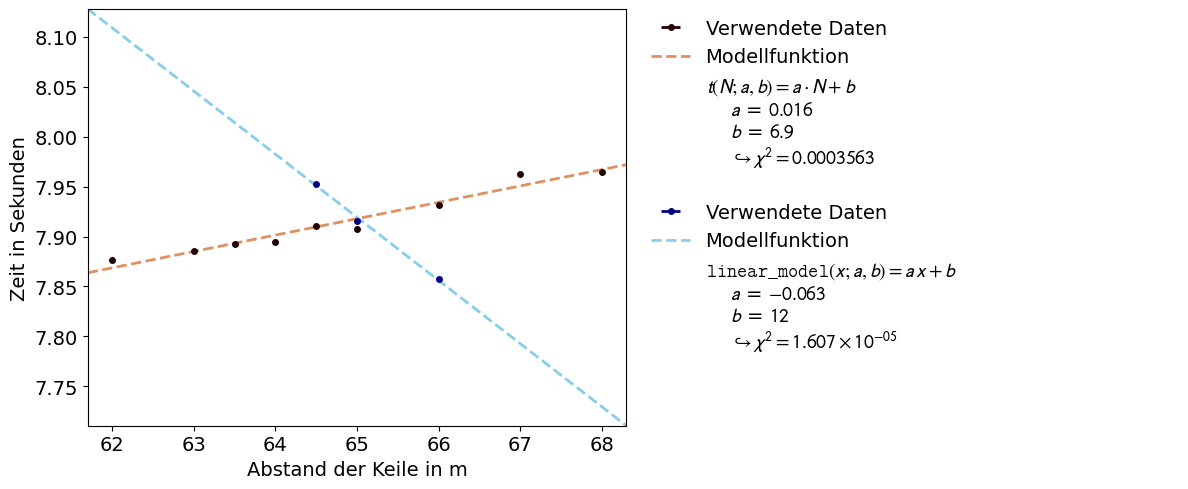

In [3]:
#Aufgabe 1.2
data=pd.read_csv('Messung/Aufgabe1.txt',delimiter=';',decimal=".",skiprows=2) #importiere Daten
data.columns=['d','t1','t2']
d = data['d'].to_numpy() 
t1 = data['t1'].to_numpy()
t2 = data['t2'].to_numpy()
t1 = t1- 0.084
t2 = t2- 0.084

xy_data = XYContainer(d,t1)

line_fit=Fit(data=xy_data)
line_fit.do_fit()
line_fit.assign_parameter_names(x='d', a='a', b='b')
line_fit.assign_model_function_expression('t1')
line_fit.assign_model_function_expression("{a} * {x} + {b}")
#line_fit.report()

line_fit.assign_parameter_latex_names(x='N', a='a', b='b')
line_fit.assign_model_function_latex_name('t')
line_fit.assign_model_function_latex_expression('{a} \\cdot {x} + {b}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["Abstand der Keile in m", "Zeit in Sekunden"]

#Wir fitten nur die 3 zum Schnittpunkt nächsten Werte.
d = d[4:7]
t2 = t2[4:7]
xy_data = XYContainer(d,t2)


line_fit2=Fit(data=xy_data)
line_fit2.do_fit()

line_fit2.data_container.label = "Verwendete Daten"
line_fit2.model_label = "Modellfunktion"

line_fit2.data_container.axis_labels = ["Abstand der Keile in m", "Zeit in Sekunden"]

plot = Plot(fit_objects=[line_fit,line_fit2])
plot.plot()
plot.show()
plot.save('Fit1_2.png')

/opt/conda/lib/python3.9/site-packages/kafe2/fit/_base/fit.py:1036: UserWarning: No data/model errors were specified. Parameter errors cannot be calculated.
  warnings.warn(


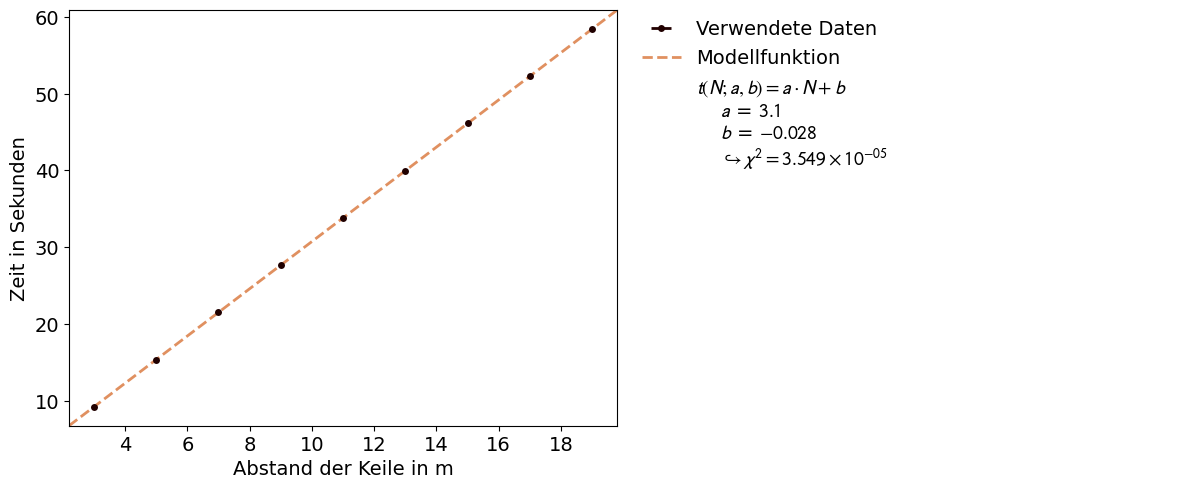

In [6]:
#Aufgabe 2.1
data=pd.read_csv('Messung/Aufgabe2.1.txt',delimiter=';',decimal=".",skiprows=2) #importiere Daten
data.columns=['N','T']
N = data['N'].to_numpy() 
T = data['T'].to_numpy()

xy_data = XYContainer(N,T)

line_fit=Fit(data=xy_data)
line_fit.do_fit()
line_fit.assign_parameter_names(x='d', a='a', b='b')
line_fit.assign_model_function_expression('t1')
line_fit.assign_model_function_expression("{a} * {x} + {b}")
#line_fit.report()

line_fit.assign_parameter_latex_names(x='N', a='a', b='b')
line_fit.assign_model_function_latex_name('t')
line_fit.assign_model_function_latex_expression('{a} \\cdot {x} + {b}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = ["Abstand der Keile in m", "Zeit in Sekunden"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
plot.save('Fit1_2.png')